<a href="https://colab.research.google.com/github/kizzanaome/Obesity-Risk-Prediction/blob/main/Obesity_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Obesity Risk Prediction**

<hr/>
<br/>

Obesity, which causes physical and mental problems, is a global health problem with serious consequences. Because of this, new research is needed that examines the influencing factors of obesity and how to predict the occurrence of the condition according to a few notable factors.

<br/>
<hr/>

## **Introduction**

#### **<u>Questions</u>**

1. ##### **How much impact do eating habits and physical conditions have on obesity?**
  - To answer this question, I have to look at the dataset that I chose to give me some quantitative data on each factor and their relation to obesity and potentially predict the level each factor adds to obesity.

2. ##### **Why did I choose this dataset and what is the purpose of this analysis?**
  - I have chosen to use the Obesity Risk Prediction dataset to figure out what factors influence obesity and any other information that I can use to predict its occurance and potentially its levels. Its purpose is to Estimate Obesity Levels Based On Eating Habits and Physical Condition

3. ##### **What do I want to learn from this?**
  - The goal is to use the data to gain a deeper understanding of what drives obesity and how different factors contribute to varying levels of obesity risk across the dataset.

<br/>
<hr/>

## **Data Selection**

#### **<u>Dataset</u>**: Estimation of Obesity Levels Based On Eating Habits and Physical Condition

1. **About the dataset**
  - This dataset includes data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

2. **Extracting the data**
  - For our dataset, I have to extract it to be able to use it here for any analysis that I will be doing. To do so, this is the process I acquire it:

In [ ]:
## import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
## read the CSV file
df = pd.read_csv('https://raw.githubusercontent.com/kizzanaome/Obesity-Risk-Prediction/main/ObesityDataSet_raw_and_data_sinthetic.csv')

3. **Previewing the data**
  - To show the contents of the data, I need to call the `df` function so that the data is displayed graphically. Here is what I run to achieve that:

In [ ]:
## show the extracted data
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

As you can see from above, the dataset contains 17 attributes and 2111 records, the records are labeled with the class variable NObeyesdad (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

4. **Understanding the data**
  - Here is a detailed explanation of each column:

    `data` columns:

      - **Gender** - Biological sex of the individual (Male or Female)
      - **Age** - How old the individual is
      - **Height** - How tall the individual is
      - **Weight** - How light or heavy the individual is
      - **family_history_with_overweight** - Has a family member suffered or suffers from overweight?
      - **FAVC** - Do you eat high caloric food frequently?
      - **FCVC** - Do you usually eat vegetables in your meals?
      - **NCP** - How many main meals do you have daily?
      - **CAEC** - Do you eat any food between meals?
      - **SMOKE** - Do you smoke?
      - **CH20** - How much water do you drink daily?
      - **SCC** - Do you monitor the calories you eat daily?
      - **FAF** - How often do you have physical activity?
      - **TUE** - How much time do you use technological devices such as cell phone, videogames, television, computer and others?
      - **CALC** - How often do you drink alcohol?
      - **MTRANS** - Which transportation do you usually use?
      - **NObeyesdad** - Obesity level

  - Continuing with indepth undertanding of the data, I separate the categorical or object data from the numerical or integer/float data





In [61]:
## specifying which values are continuous/numerical and which ones are categorical
df_category = df.select_dtypes(include=['object']).columns.tolist()
df_numerical = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical cols:")
print(df_category)
print("Numerical cols:")
print(df_numerical)

Categorical cols:
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Numerical cols:
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


  - As I continue the data, I am going to do some basic understanding of the data to find out the nature of the data. To achieve this, I will run the following commands:
      - Dataframe `shape`
      - Dataframe `head` and `tail`
      - Dataframe `dtypes`
      - Dataframe `describe`
      - Dataframe `info`

In [ ]:
## show the number of rows and columns
df.shape

(2111, 17)

In [ ]:
## return the first five records
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [ ]:
## return the last five records
df.tail()

Gender        Age    Height      Weight family_history_with_overweight  \
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O SCC       FAF       TUE  \
2106  yes   3.0  3.0  Sometimes    no  1.728139  no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130  no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193  no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339  no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513  no  1.026452  0.714137   

           CALC                 MTRANS        NObeyesdad  
2106  Sometimes  Public_Transportation  Obesity_Type_III  
2107  Sometimes  Public_Transportation  Obesity_Type_III  
2108  Sometimes  Public_Transportation  Obesity_Type_III  
2109  Sometimes  Public_Transportation  Obesity_Type_III  
2110  Sometimes  Public_Transportation  Obesity_Type_III

In [ ]:
## show the datatype of each column
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [ ]:
## show the standard calculations for any numerical values
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [ ]:
## show the non-null count and datatype for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

From the above, we can deduce that:

- There are 2111 entries, i.e. 2111 rows.
- Each row has a row label (aka the index) with values ranging from 0 to 2110.
- The table has 17 columns. All columns have a value for each of the rows (all 2111 values are non-null).
- The columns `Gender`, `family_history_with_overweight`, `FAVC`, `FCVC`, `CAEC`, `SMOKE`, `SCC`, `CALC`, `MTRANS` and `NObeyesdad` consists of textual data (strings, aka object). The other columns are numerical data with real numbers (aka float).
- There are 8 `float` data types and 9 `object` data types

<br/>
<hr/>

## **Data Wrangling**

To figure out my answer to the question I had asked earlier, I now have to do an in depth analysis of the data that I have now have and can access. To do so, I have to ask a few questions to well understand what data am working with:

#### **<u>Questions</u>**

1. ##### **Are there any missing data or values in the dataset?**
  - I need to know if there are any missing values, null values or `0` values so that I can clean that up. To achieve that, I run the following command:

In [ ]:
## identify missing values and how often they occur in our dataset
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

From the above, it shows that there are no missing values, null values or `0` values, so there is no need to clean the data.

2. ##### **Are there any white spaces or badly named columns in the dataset?**
  - I need to know if there are any white spaces in the titles of the column for example when naming the columns if any mistake was made so that I can clean that up. To achieve that, I run the following command:

In [ ]:
## show the column names
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

From the above, everything looks clean as we need to be and so there is no need to clean any white spaces or wrong naming

3. ##### **Are there any duplicated data or values in the dataset?**
  - I need to know if there are any duplicates for example data that shows a form of duplication or was repeated during solistation so that I can clean that up. To achieve that, I run the following command:

In [ ]:
# find duplicated rows
df.loc[df.duplicated()]

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
98   Female  21.0    1.52    42.0                             no   no   3.0   
106  Female  25.0    1.57    55.0                             no  yes   2.0   
174    Male  21.0    1.62    70.0                             no  yes   2.0   
179    Male  21.0    1.62    70.0                             no  yes   2.0   
184    Male  21.0    1.62    70.0                             no  yes   2.0   
209  Female  22.0    1.69    65.0                            yes  yes   2.0   
309  Female  16.0    1.66    58.0                             no   no   2.0   
460  Female  18.0    1.62    55.0                            yes  yes   2.0   
467    Male  22.0    1.74    75.0                            yes  yes   3.0   
496    Male  18.0    1.72    53.0                            yes  yes   2.0   
527  Female  21.0    1.52    42.0                             no  yes   3.0   
659  Female  21.0    1.52    42.0                             no  yes   3.0   
663  Female  21.0    1.52    42.0                             no  yes   3.0   
763    Male  21.0    1.62    70.0                             no  yes   2.0   
764    Male  21.0    1.62    70.0                             no  yes   2.0   
824    Male  21.0    1.62    70.0                             no  yes   2.0   
830    Male  21.0    1.62    70.0                             no  yes   2.0   
831    Male  21.0    1.62    70.0                             no  yes   2.0   
832    Male  21.0    1.62    70.0                             no  yes   2.0   
833    Male  21.0    1.62    70.0                             no  yes   2.0   
834    Male  21.0    1.62    70.0                             no  yes   2.0   
921    Male  21.0    1.62    70.0                             no  yes   2.0   
922    Male  21.0    1.62    70.0                             no  yes   2.0   
923    Male  21.0    1.62    70.0                             no  yes   2.0   

     NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
98   1.0  Frequently    no   1.0  no  0.0  0.0  Sometimes   
106  1.0   Sometimes    no   2.0  no  2.0  0.0  Sometimes   
174  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
179  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
184  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
209  3.0   Sometimes    no   2.0  no  1.0  1.0  Sometimes   
309  1.0   Sometimes    no   1.0  no  0.0  1.0         no   
460  3.0  Frequently    no   1.0  no  1.0  1.0         no   
467  3.0  Frequently    no   1.0  no  1.0  0.0         no   
496  3.0   Sometimes    no   2.0  no  0.0  2.0  Sometimes   
527  1.0  Frequently    no   1.0  no  0.0  0.0  Sometimes   
659  1.0  Frequently    no   1.0  no  0.0  0.0  Sometimes   
663  1.0  Frequently    no   1.0  no  0.0  0.0  Sometimes   
763  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
764  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
824  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
830  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
831  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
832  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
833  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
834  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
921  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
922  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
923  1.0          no    no   3.0  no  1.0  0.0  Sometimes   

                    MTRANS           NObeyesdad  
98   Public_Transportation  Insufficient_Weight  
106  Public_Transportation        Normal_Weight  
174  Public_Transportation   Overweight_Level_I  
179  Public_Transportation   Overweight_Level_I  
184  Public_Transportation   Overweight_Level_I  
209  Public_Transportation        Normal_Weight  
309                Walking        Normal_Weight  
460  Public_Transportation        Normal_Weight  
467             Automobile        Normal_Weight  
496

In [ ]:
df.duplicated().sum()

24

## **Exploratory Data Analysis (EDA)**

In this phase we are going to identiy meaningfull patterns in our dataset

#### **<u>Questions</u>**

1. **What are the distributions of Key variables between Age, Height, Weight, physical activity, and obesity levels?**

2. **What do I want to achieve from the analysis?**
  - I would like to explore how different variables, such as physical activity, and calorie intake, are correlated with obesity levels to better understand risk patterns.
  - I also want to carry out the following:
    - I would like to identify the Key Factors Contributing to Obesity i.e Identify the lifestyle, physical, and health factors (e.g., age, diet, physical activity) that have the most significant impact on obesity risk.
    - I would like to understand the distribution of key variables like  age, weight and physical activity levels to see how they relate to obesity across different populations.
    - I would also want to identify any outliers or data anomalies that could skew the analysis or provide insights into unusual cases of obesity risk.
  
3. **What are potential outliers in the dataset?**


####**Univariate Analysis | Feature understanding**

- Plotting Freature Distributions
  - Histogram
  - KDE
  - Boxplot




In [ ]:
df["Weight"].value_counts()

Weight
80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: count, Length: 1525, dtype: int64

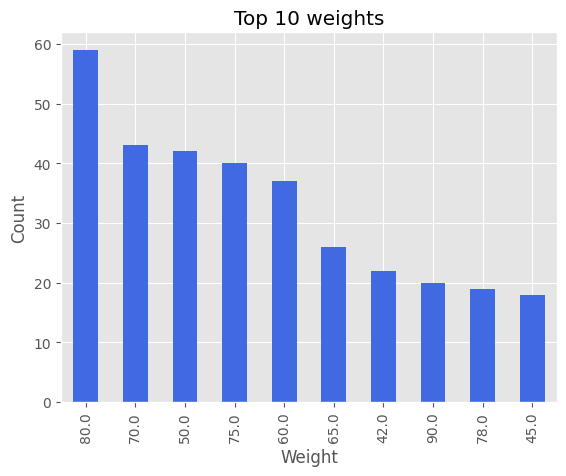

In [ ]:
# Ploting the top 10 values of Weight

ax = df["Weight"].value_counts() \
.head(10) \
.plot(kind="bar", title = "Top 10 weights", color="royalblue")

ax.set_ylabel("Count")
plt.show()

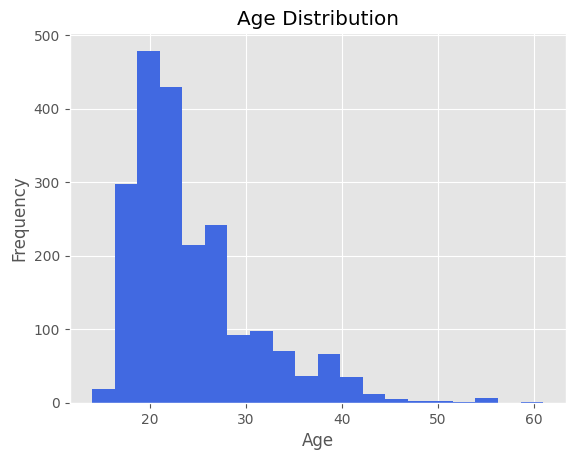

In [ ]:
ax = df["Age"].plot(kind="hist",
               bins=20,
               color="royalblue",
               title ="Age Distribution")
ax.set_xlabel("Age")
plt.show()

**Physical Activity frequency (FAF)**

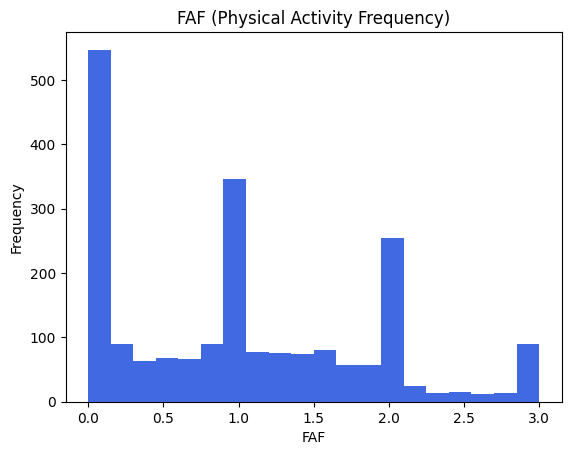

In [55]:
ax = df["FAF"].plot(kind="hist",
               bins=20,
               color="royalblue",
               title ="FAF (Physical Activity Frequency)")
ax.set_xlabel("FAF")
plt.show()

**FAVC(High calory food intake frequency)**

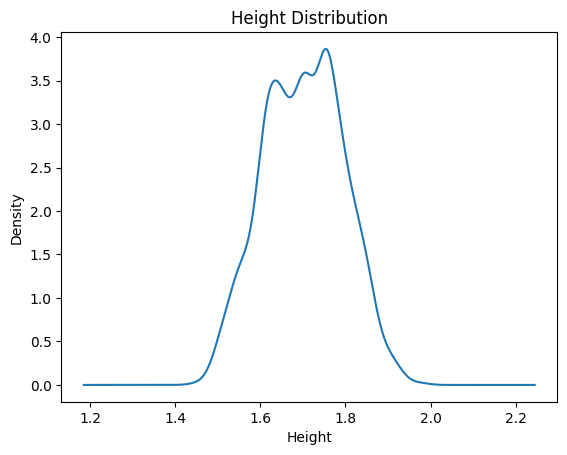

In [ ]:
ax = df["Height"].plot(kind="kde", title = "Height Distribution")

ax.set_xlabel("Height")
plt.show()

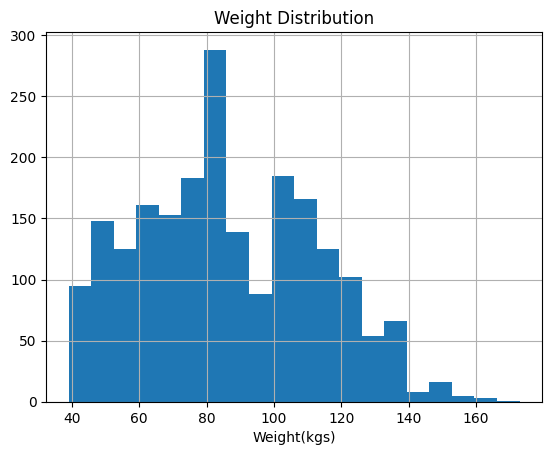

In [ ]:
# Analysing a single column

df["Weight"].hist(bins=20)
plt.title("Weight Distribution")
plt.xlabel("Weight(kgs)")
plt.show()

**Comparing the distribution of Weight between different Gender categories**

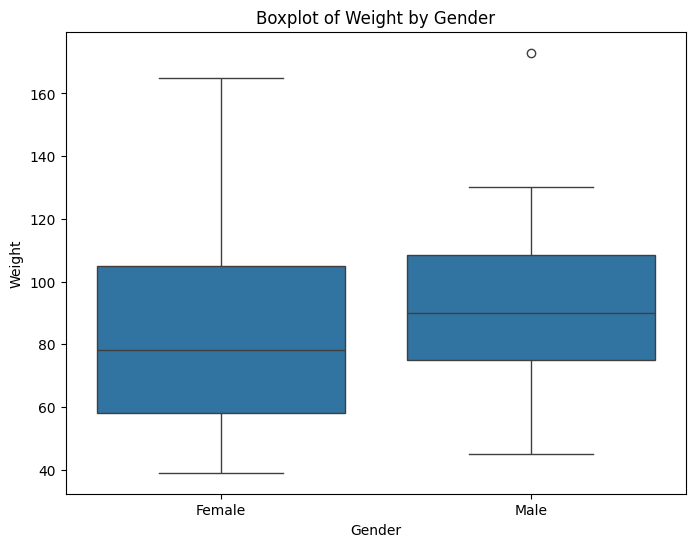

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Gender", y="Weight", data=df)

## Adding titles and labels
plt.title("Boxplot of Weight by Gender")
plt.xlabel("Gender")
plt.ylabel("Weight")
plt.show()

From the box plot above it is observed that:

  **Females:**
  - The female median weight is around 80 kg.
  - The box for females is larger than for males, indicating more variability in weight among females than males.
  - For females, the weight ranges from approximately 40 kg to 160 kg.
  - Females have a wider range of weights (larger IQR and whiskers) compared to males.


  **Males:**
  - The male median weight is slightly lower, approximately 75 kg
  - For males, the weight ranges from around 50 kg to 120 kg.

  **Outliers(Circles)**
  - There is one outlier visible above the whisker for males, which suggests an individual with a significantly higher weight than the rest of the male population in the dataset.







**Boxplot for Obesity Levels (NObeyesdad)**
- How does Weight vary across different Obesity Levels?


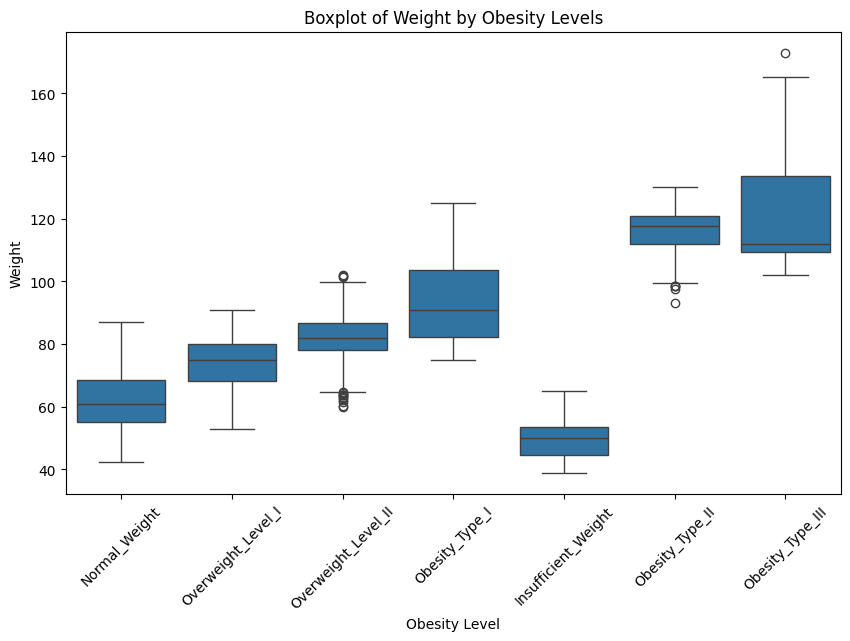

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad', y='Weight', data=df)

# Adding titles and labels
plt.title('Boxplot of Weight by Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Weight')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

From the analysis made through the ploting of the graph, here are some key observations.


  - As expected, the weight increases progressively from **Normal Weight** to **Obesity Type III**, with each category having a higher median weight.
  
  - Obesity levels II and III have more noticeable **outliers**, indicating that some individuals do not follow the typical pattern within their categories.
  The spread of the data (as shown by the whiskers and the interquartile range(IQR)) increases as the obesity level increases, indicating more variability in weight among higher obesity categories.


<br/>

---



## **Feature Relationships**

### **Question**

How do different features relate to each other in our dataset?


*   Scatterplot
*   Heatmap Correlation
*   Pairplot
*   Groupby comparisons




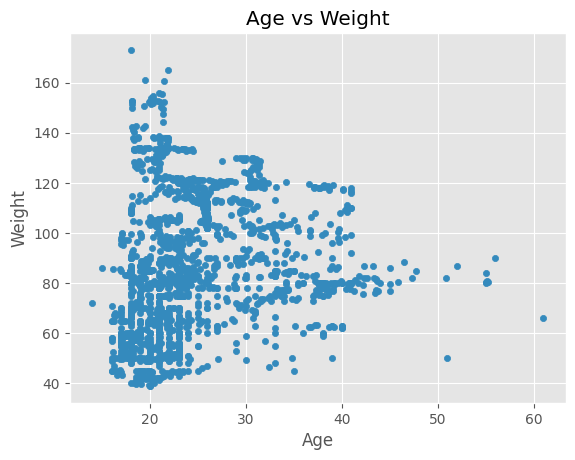

In [ ]:
df.plot(kind="scatter", x="Age" , y="Weight" ,title="Age vs Weight")
plt.show()

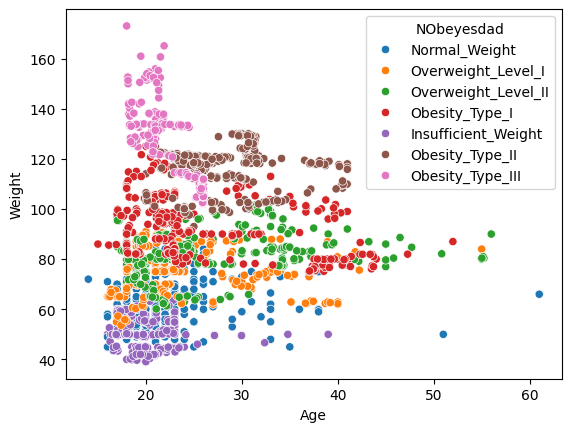

In [ ]:
sns.scatterplot(x="Age",y="Weight", data=df,
                hue ="NObeyesdad"
                )
plt.show()

In [ ]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

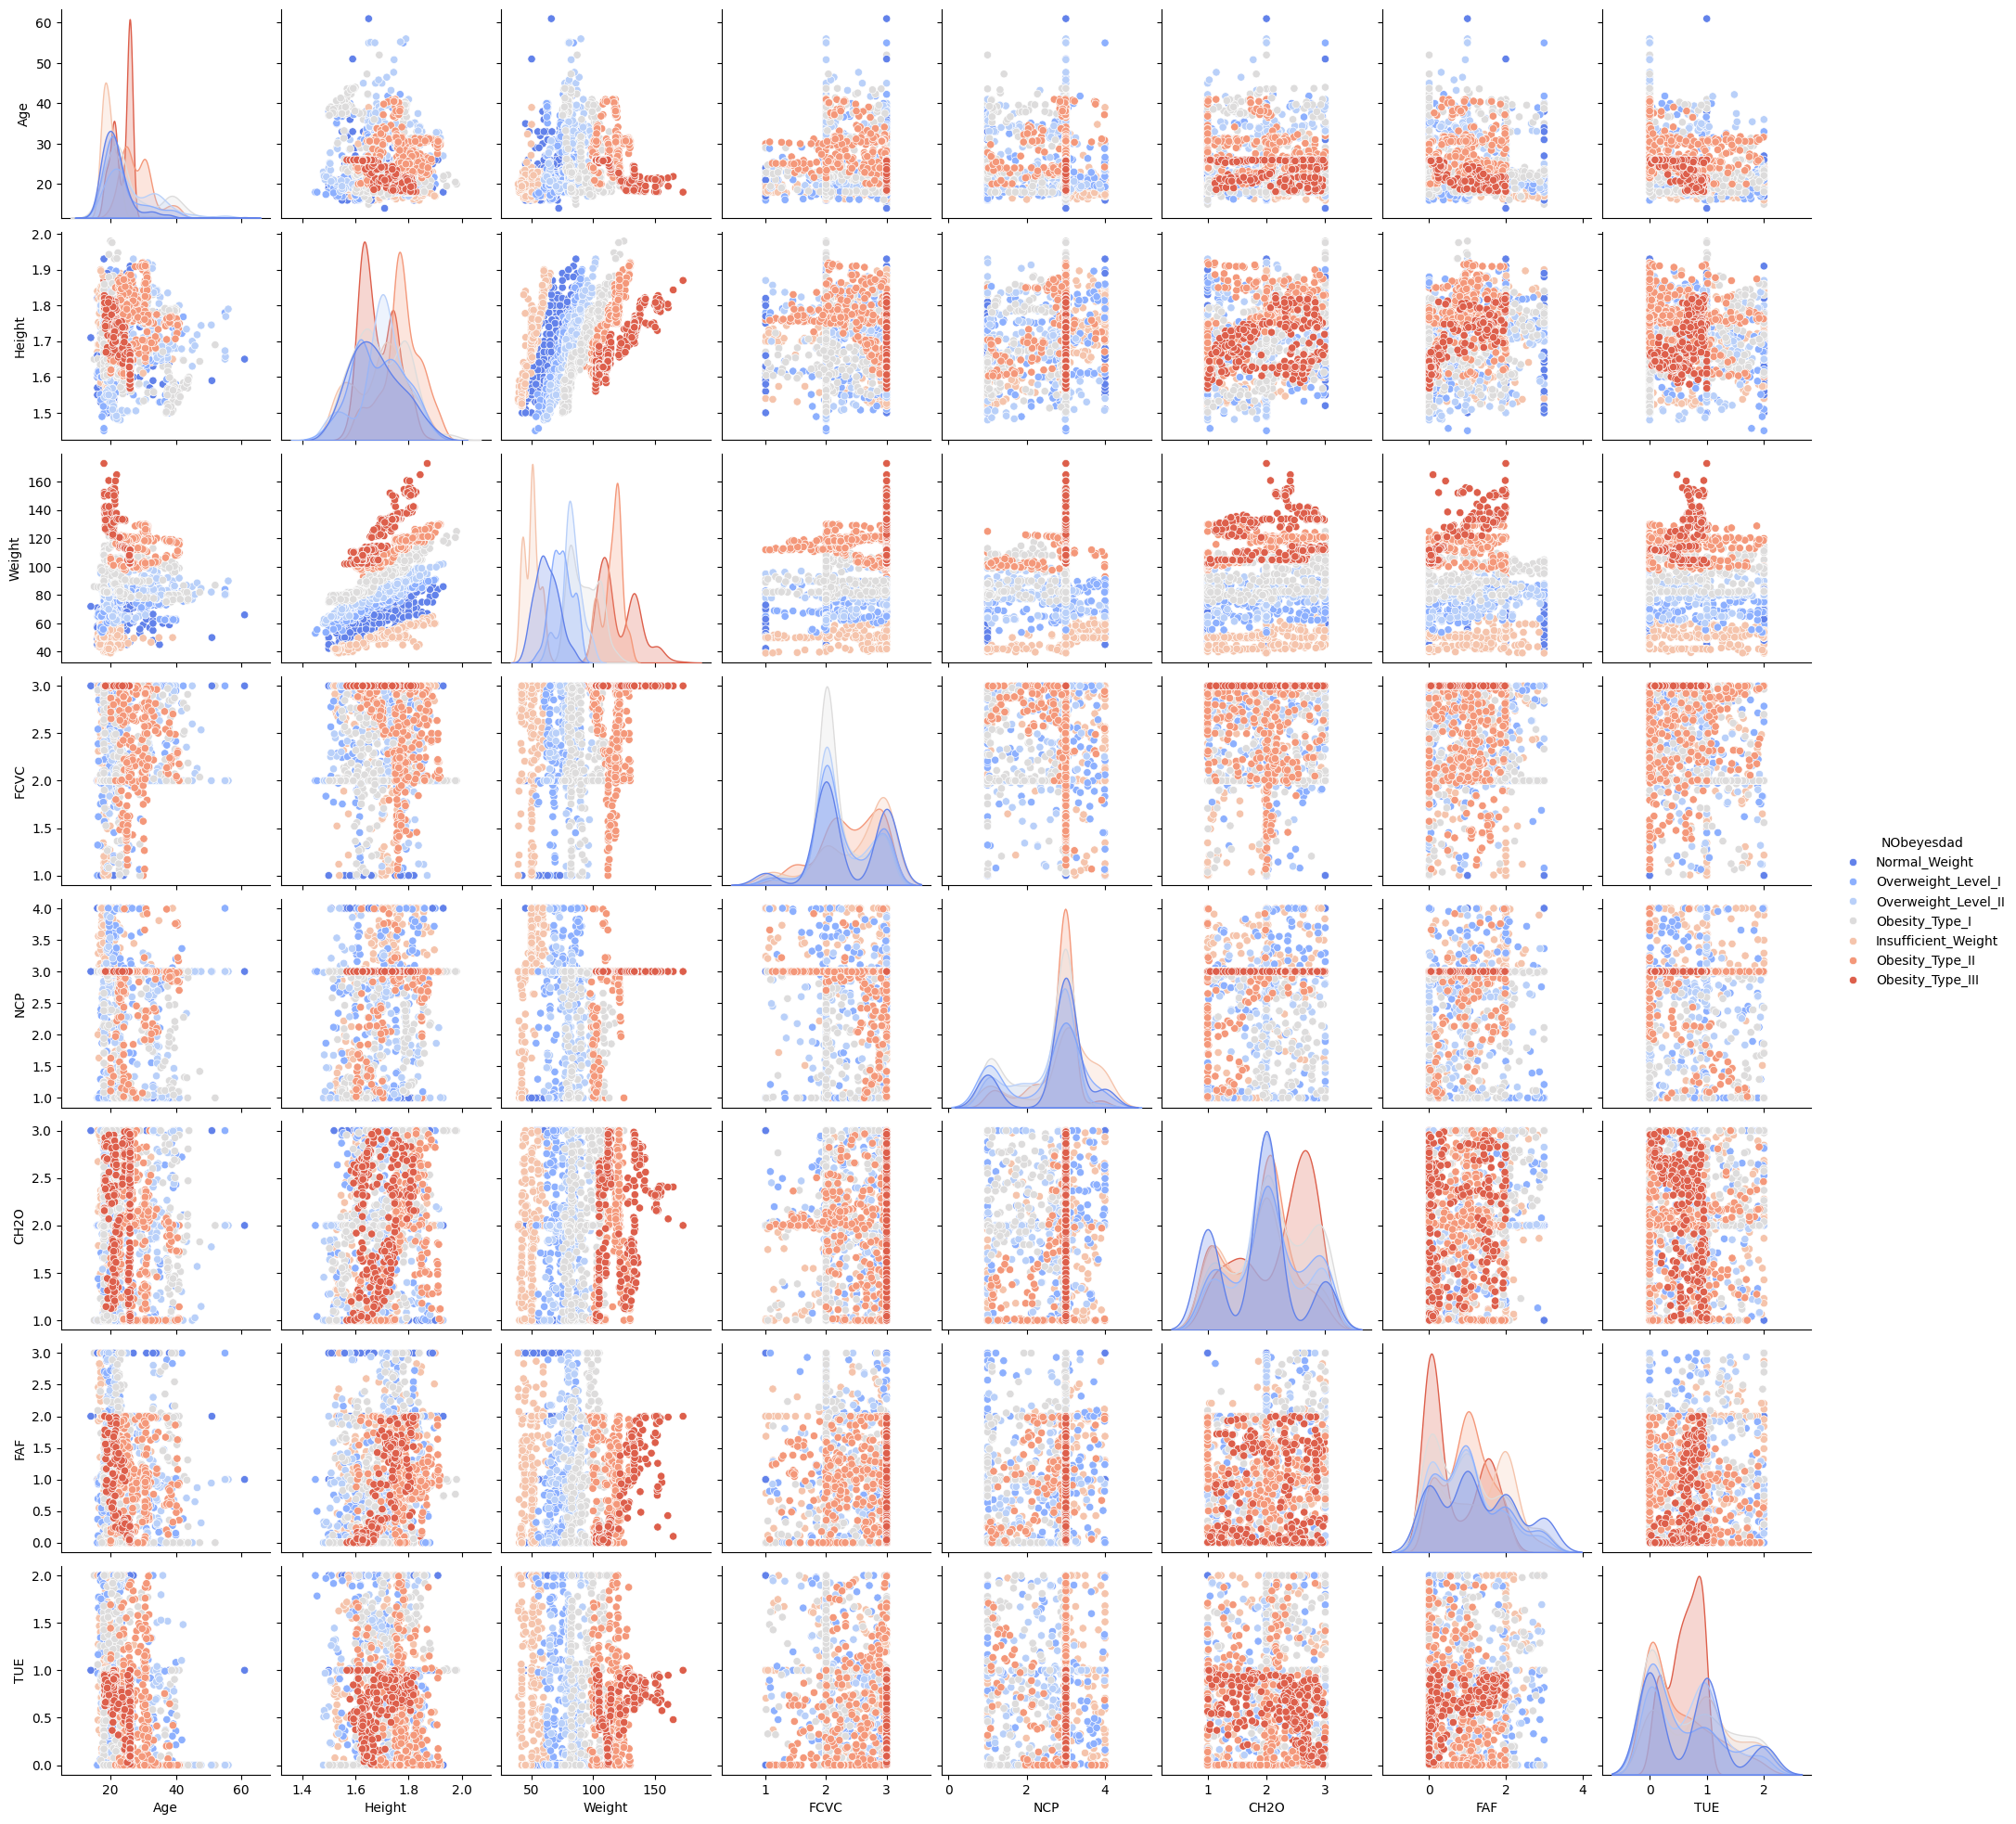

In [62]:
sns.pairplot(df,vars=df_numerical, hue="NObeyesdad", palette='coolwarm')
plt.show()

In [ ]:
## plot a heat map by choosing only numerical data
numerical_df = df.select_dtypes(include=np.number).columns.tolist()
numerical_df
df_corr = df[numerical_df].corr()
df_corr


Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.016291 -0.043944 -0.045304 -0.144938   
Height -0.025958  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.202560  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.016291 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.043944  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   
CH2O   -0.045304  0.213376  0.200575  0.068461  0.057088  1.000000  0.167236   
FAF    -0.144938  0.294709 -0.051436  0.019939  0.129504  0.167236  1.000000   
TUE    -0.296931  0.051912 -0.071561 -0.101135  0.036326  0.011965  0.058562   

             TUE  
Age    -0.296931  
Height  0.051912  
Weight -0.071561  
FCVC   -0.101135  
NCP     0.036326  
CH2O    0.011965  
FAF     0.058562  
TUE     1.000000

#### Visualising which variables are strongly related, and weakly related.

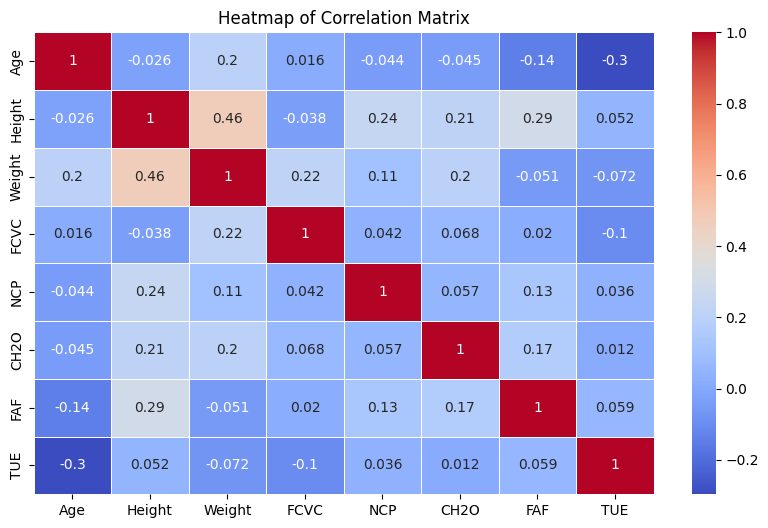

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

From the above heatmap correletation matrix:

- It is observed that most correlations seem weak or moderate, except for **Height** and **Weight** which shows a stronger positvie relation (0.46).

- Physical activity**(FAF)** has a weak but generaly positive relationship with other health behavior like Water intake **(CH20)** and Vegetable Consumptions**(FCVC)**.
- **Weight** and **FAF** (physical activity frequency) have a weak negative correlation of (-0.051). Which means that increased pysical activity migtht have a small inverse realtion with weight.


In [ ]:
print(df.duplicated().sum())

24


In [ ]:
df["Age"].unique()

array([21.      , 23.      , 27.      , ..., 22.524036, 24.361936,
       23.664709])

In [ ]:
df["Age"].value_counts()

Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: count, Length: 1402, dtype: int64

In [ ]:
dataf2 = df[df['Weight']== 84]
dataf2

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
92    Male  55.0    1.78    84.0                            yes   no   3.0   
153   Male  34.0    1.69    84.0                            yes   no   2.0   
177   Male  22.0    1.84    84.0                            yes  yes   3.0   
178   Male  26.0    1.91    84.0                            yes  yes   3.0   
488   Male  21.0    1.88    84.0                            yes  yes   3.0   
490   Male  24.0    1.75    84.0                             no  yes   3.0   

     NCP        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
92   4.0  Frequently    no   3.0  yes  3.0  0.0  Frequently   
153  3.0   Sometimes    no   3.0   no  2.0  0.0          no   
177  3.0  Frequently    no   2.0  yes  3.0  0.0   Sometimes   
178  3.0  Frequently   yes   2.0   no  2.0  2.0  Frequently   
488  3.0   Sometimes    no   3.0   no  2.0  1.0   Sometimes   
490  3.0          no    no   2.0  yes  1.0  0.0   Sometimes   

                    MTRANS           NObeyesdad  
92                 Walking   Overweight_Level_I  
153             Automobile  Overweight_Level_II  
177  Public_Transportation        Normal_Weight  
178  Public_Transportation        Normal_Weight  
488                Walking        Normal_Weight  
490  Public_Transportation  Overweight_Level_II

In [ ]:
dataf3 = dataf2[dataf2["NObeyesdad"] == "Obesity_Type_I"]
dataf3

Gender        Age    Height      Weight family_history_with_overweight  \
10     Male  26.000000  1.850000  105.000000                            yes   
134    Male  30.000000  1.770000  109.000000                            yes   
188    Male  35.000000  1.780000  105.000000                            yes   
206    Male  19.000000  1.750000  100.000000                            yes   
257    Male  19.000000  1.850000  115.000000                             no   
...     ...        ...       ...         ...                            ...   
1494   Male  18.000000  1.803527  108.251044                            yes   
1495   Male  29.409825  1.801224  108.156190                            yes   
1496   Male  28.421533  1.829239  107.108190                            yes   
1511   Male  18.880610  1.804160  104.406820                            yes   
1512   Male  19.850524  1.785062  104.187314                            yes   

     FAVC      FCVC       NCP        CAEC SMOKE      CH2O  SCC       FAF  \
10    yes  3.000000  3.000000  Frequently    no  3.000000   no  2.000000   
134   yes  3.000000  3.000000   Sometimes    no  1.000000   no  2.000000   
188   yes  3.000000  1.000000          no    no  3.000000   no  3.000000   
206   yes  2.000000  3.000000  Frequently    no  2.000000   no  2.000000   
257    no  2.000000  3.000000   Sometimes    no  3.000000  yes  1.000000   
...   ...       ...       ...         ...   ...       ...  ...       ...   
1494  yes  2.000000  1.709546   Sometimes    no  2.530157   no  1.000000   
1495  yes  2.385502  2.883984   Sometimes    no  2.140544   no  1.144876   
1496  yes  2.465575  2.935381   Sometimes    no  2.480555   no  1.001830   
1511  yes  2.000000  3.000000   Sometimes    no  3.000000   no  2.240500   
1512  yes  2.000000  3.000000   Sometimes    no  2.151570   no  1.605983   

           TUE        CALC                 MTRANS      NObeyesdad  
10    2.000000   Sometimes  Public_Transportation  Obesity_Type_I  
134   0.000000   Sometimes             Automobile  Obesity_Type_I  
188   1.000000  Frequently             Automobile  Obesity_Type_I  
206   0.000000          no  Public_Transportation  Obesity_Type_I  
257   2.000000          no  Public_Transportation  Obesity_Type_I  
...        ...         ...                    ...             ...  
1494  0.645400          no  Public_Transportation  Obesity_Type_I  
1495  1.767468   Sometimes             Automobile  Obesity_Type_I  
1496  1.670313   Sometimes             Automobile  Obesity_Type_I  
1511  0.000000          no  Public_Transportation  Obesity_Type_I  
1512  0.000000          no  Public_Transportation  Obesity_Type_I  

[105 rows x 17 columns]

<Axes: >

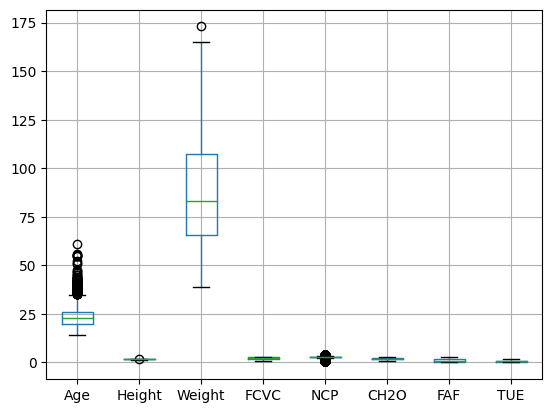

In [ ]:
df.boxplot()

In [ ]:
df["Weight"].unique()

array([ 64.      ,  56.      ,  77.      , ..., 133.689352, 133.346641,
       133.472641])

In [ ]:
df["Gender"].describe()

count     2111
unique       2
top       Male
freq      1068
Name: Gender, dtype: object